In [1]:
import pandas as pd
import datetime
import json
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
from matplotlib.image import imread
from keras.preprocessing import image
from sklearn.metrics import r2_score
import seaborn as sns

Using TensorFlow backend.


### Pulling stock list from Virtus LifeSci Biotech ETF

In [2]:
stocks = ['ITCI', 'AXSM', 'CVM', 'KRTX', 'APLS', 'PRVB', 'CRTX', 'EPZM',
       'CRBP', 'CCXI', 'TGTX', 'IMGN', 'FATE', 'AKBA', 'DNLI', 'RIGL',
       'PRNB', 'ARVN', 'ZYME', 'MRNA', 'CYTK', 'FTSV', 'ASND',
       'XBIT', 'ALEC', 'ORTX', 'ADVM', 'MGNX', 'AKRO', 'ESPR', 'BHVN',
       'YMAB', 'RGNX', 'MYOK', 'TPTX', 'ATNX', 'BLUE', 'AGEN', 'AVRO',
       'DCPH', 'CTMX', 'SRNE', 'ARDX', 'BCRX', 'RETA', 'KOD', 'DTIL',
       'RARX', 'AUTL', 'GTHX', 'CARA', 'KDMN', 'XNCR', 'ACHN', 'ARNA',
       'RCKT', 'TBIO', 'VYGR', 'SGMO', 'ODT', 'ANAB', 'ATRA', 'CNST',
       'GERN', 'BPMC', 'ALLO', 'BBIO', 'FGEN', 'PGNX', 'MGTX', 'NXTC',
       'IMMU', 'ZIOP', 'CRSP', 'IOVA', 'VKTX', 'EIDX', 'MYOV', 'AMRS',
       'KRYS', 'KURA', 'MDGL', 'UBX', 'TCDA', 'QURE', 'MRTX', 'ASMB',
       'GLYC', 'RYTM', 'FIXX', 'DRNA', 'ARWR', 'ALLK', 'GOSS', 'WVE']

In [3]:
dataframe_dict= {}
for stock in stocks: 

    df = pdr.get_data_yahoo(stock, start='2000-01-01')
    # Change inde to a date  string
    df['Date'] = df.index.strftime("%Y-%m-%d %H:%M:%S")
    
    dataframe_dict[stock] = df.to_dict('records')

In [4]:
data = dataframe_dict

In [5]:
start = datetime.datetime.now()
period = [1, 2]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_1'] = _low
        stock_dict_list[index]['Max_1'] = _max
    data[stock] = stock_dict_list

# 3 Day Max/Min Value (% Difference from Closing Price)
# The range is from the 2nd day to the 3rd after the input day
start = datetime.datetime.now()
period = [2, 4]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_3'] = _low
        stock_dict_list[index]['Max_3'] = _max
    data[stock] = stock_dict_list

# 10 Day Max/Min Value (% Difference from Closing Price)
# The range is from the 4th day to the 10th after the input day

start = datetime.datetime.now()
period = [4, 11]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_10'] = _low
        stock_dict_list[index]['Max_10'] = _max
    data[stock] = stock_dict_list

# 30 Day Max/Min Value (% Difference from Closing Price)
# The range is from the 11th day to the 30th after the input day
start = datetime.datetime.now()
period = [11, 31]
for stock in stocks:
    
    stock_dict_list = data[stock]
    num_days = len(stock_dict_list)
    for index, dict_ in enumerate(stock_dict_list):
        _open = dict_['Open']
        if index+period[1] >= num_days:
            _low = None
            _max = None
        else:
            _low = np.min([dict_['Low'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
            _max = np.max([dict_['High'] for dict_ in stock_dict_list[index+period[0]:index+period[1]]])/ _open -1
        stock_dict_list[index]['Low_30'] = _low
        stock_dict_list[index]['Max_30'] = _max
    data[stock] = stock_dict_list

In [6]:
for stock in stocks:
  df = pd.DataFrame(data[stock])
  max_value = df[['High', 'Low', 'Open', 'Close', 'Adj Close']].max()
  df[['High', 'Low', 'Open', 'Close', 'Adj Close']] = df[['High', 'Low', 'Open', 'Close', 'Adj Close']]/max_value
  df['Volume'] = df['Volume']/ df['Volume'].max()
  df= df.dropna()
  data[stock] = df.to_dict('records')

In [7]:
data_in_list = []
for stock in stocks:
    stock_dict_list = data[stock]
    for index, dict_ in enumerate(stock_dict_list):
        dict_['Ticker'] = stock
        data_in_list.append(dict_)
df = pd.DataFrame(data_in_list) 
df.describe()

,Adj Close,Close,High,Low,Low_1,Low_10,Low_3,Low_30,Max_1,Max_10,Max_3,Max_30,Open,Volume
count,145617.000000,145617.000000,145617.000000,145617.000000,145617.000000,145617.000000,145617.000000,145617.000000,145617.000000,145617.000000,145617.000000,145617.000000,145617.000000,145617.000000
mean,0.259968,0.259968,0.258394,0.261542,14.641237,-0.001656,4.127149,0.087188,14.784690,48.869921,25.622393,60.120993,0.258591,0.025404
std,0.231725,0.231725,0.230995,0.232030,241.921582,18.152169,128.966701,29.641945,243.169655,509.347436,330.676845,674.870565,0.231053,0.051114
min,0.000002,0.000002,0.000003,0.000002,-0.999869,-0.999948,-0.999899,-0.999972,-0.999847,-0.999833,-0.999875,-0.951601,0.000003,0.000000
25%,0.072608,0.072608,0.072023,0.074089,-0.056418,-0.140684,-0.080330,-0.236926,0.000000,0.006499,0.000000,0.017668,0.071815,0.002547
50%,0.187084,0.187084,0.184749,0.188308,-0.025311,-0.070000,-0.036585,-0.124506,0.021519,0.071053,0.033149,0.135714,0.185210,0.010817
75%,0.385352,0.385352,0.382807,0.385996,0.000000,-0.010714,0.000000,-0.021782,0.055138,0.163004,0.083688,0.308368,0.382657,0.030050
max,1.000000,1.000000,1.000000,1.000000,6817.181855,3998.999810,5472.684279,3998.999810,6817.181855,35599.000796,29665.666409,38399.000858,1.000000,1.000000


In [8]:
processed_data = {}

for stock in stocks:
  x = []
  target = []
  dict_ = {}
  for i in data[stock]:
    row =np.array([i['High'], i['Low'], i['Open'], i['Close'], i['Adj Close'], i['Volume']])
    x.append(row)
    row = np.array(i['Low_1'])
    target.append(row)
  dict_['Data'] = x
  dict_['Target'] = target
  processed_data[stock] = dict_

In [9]:
for stock in stocks:
  length_ = len(processed_data[stock]['Data'])
  length_test = len(processed_data[stock]['Data'])//8
  test_start = length_- 50
  test_end = length_test+ test_start
  processed_data[stock]['data_1'] = np.array(processed_data[stock]['Data'][:test_start])
  processed_data[stock]['data_1'] =   processed_data[stock]['data_1'].reshape(len(processed_data[stock]['data_1']), 1, 6)
  processed_data[stock]['data_test'] = np.array(processed_data[stock]['Data'][test_start:-10])
  processed_data[stock]['data_test'] = processed_data[stock]['data_test'].reshape(len(processed_data[stock]['data_test']),1,6)
  transfer_list = np.array(processed_data[stock]['Target'][:test_start])
  processed_data[stock]['target_1'] =transfer_list.reshape(len(transfer_list), 1)
  transfer_list = np.array(processed_data[stock]['Target'][test_start:-10])
  processed_data[stock]['target_test'] = transfer_list.reshape(len(transfer_list),1)

In [10]:
model = models.load_model('model.h5')
model.load_weights('weight.h5')

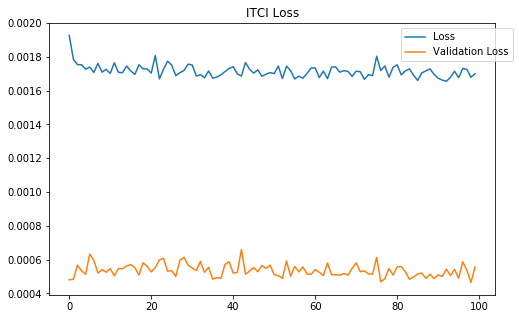

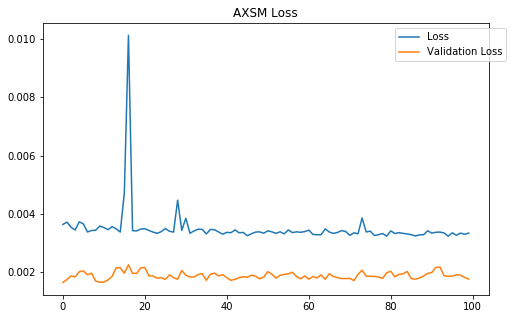

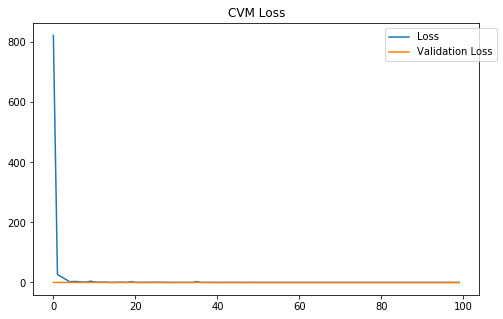

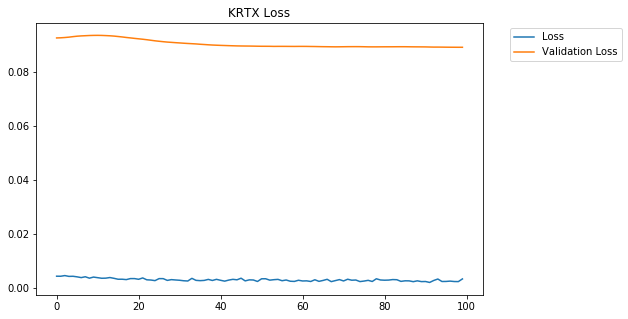

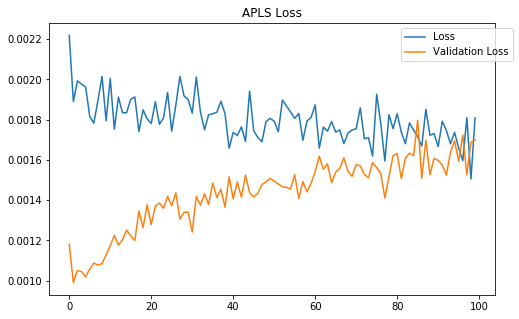

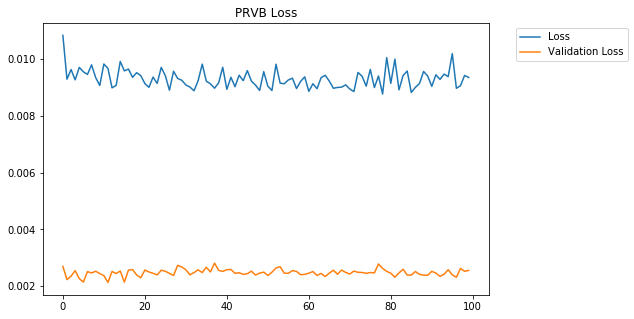

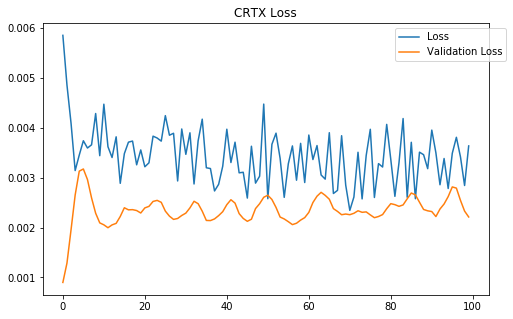

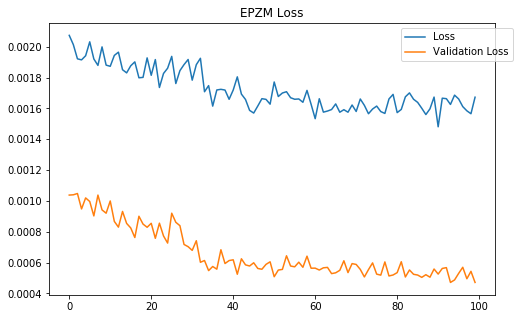

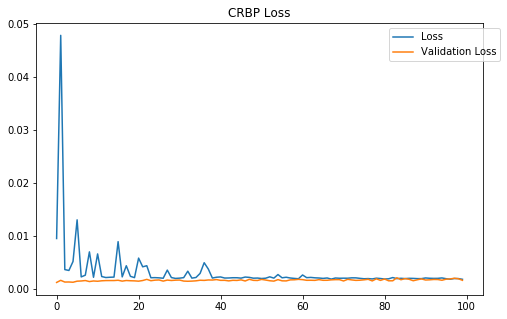

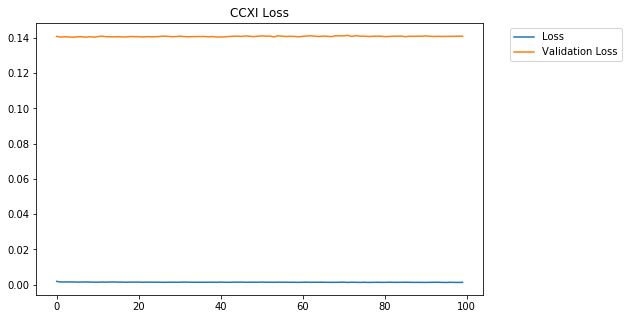

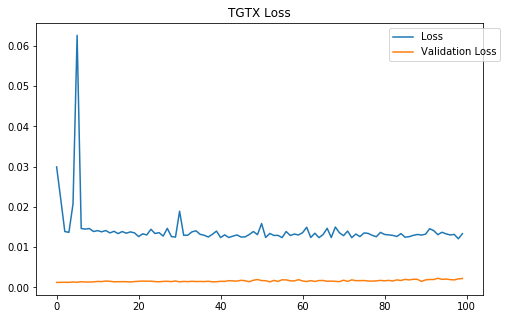

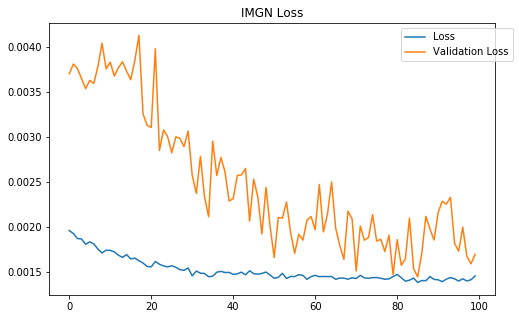

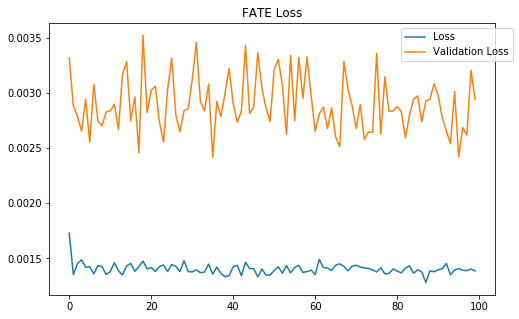

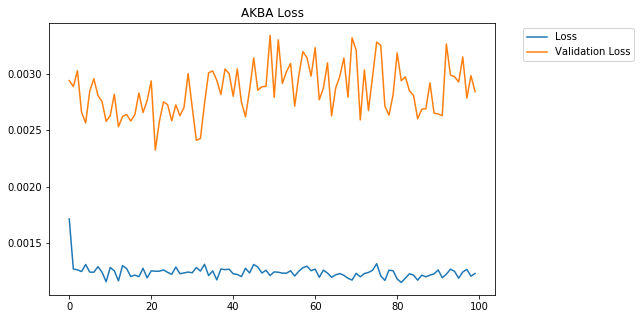

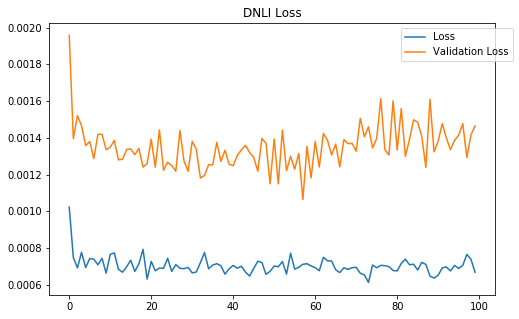

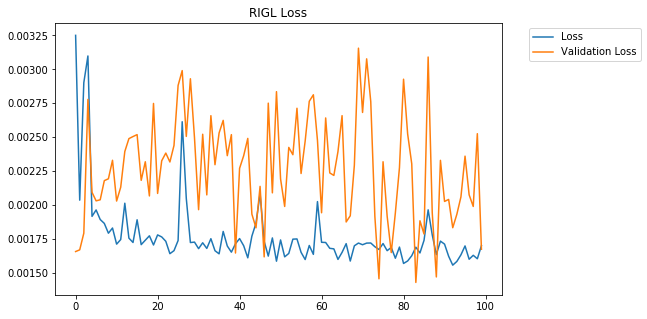

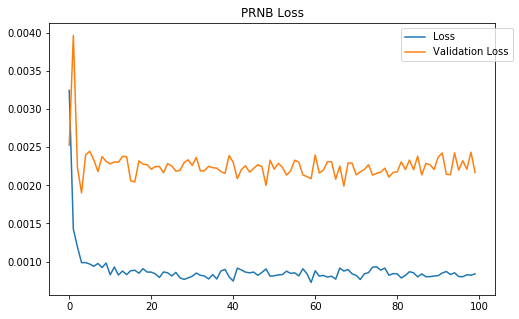

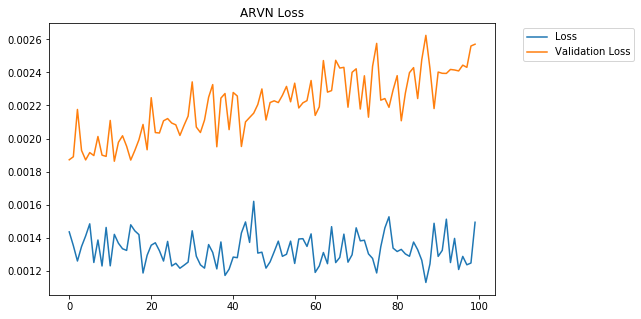

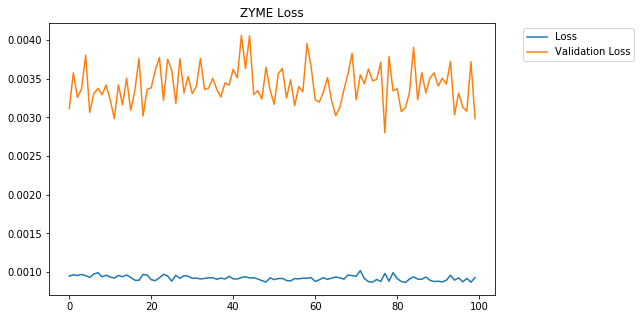

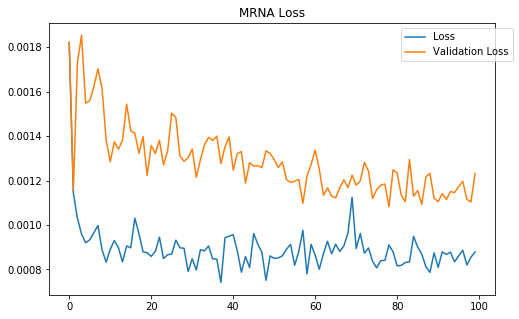

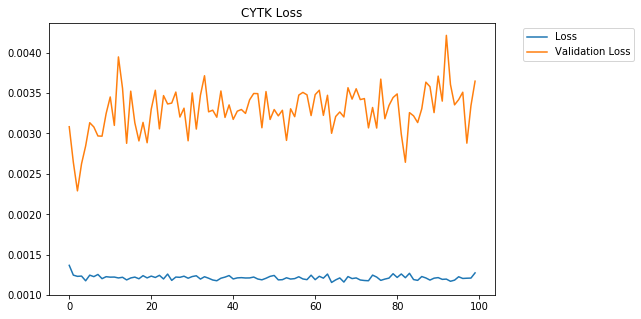

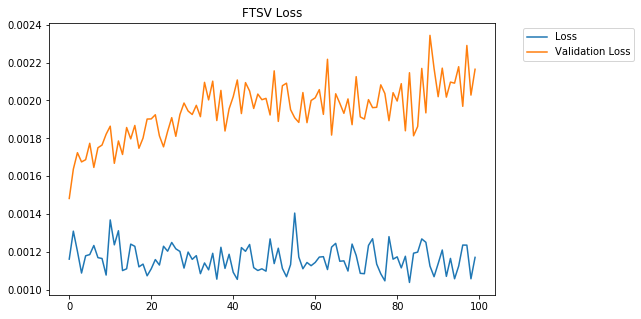

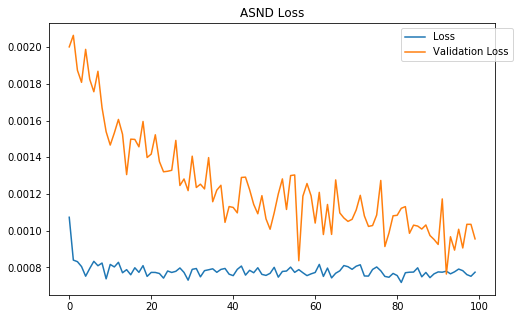

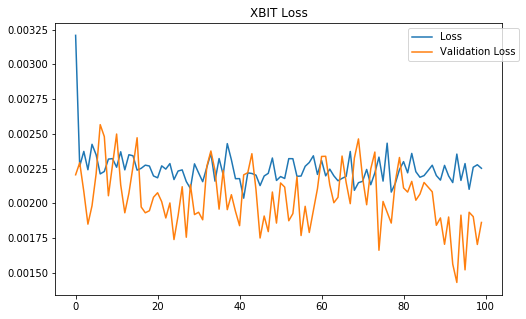

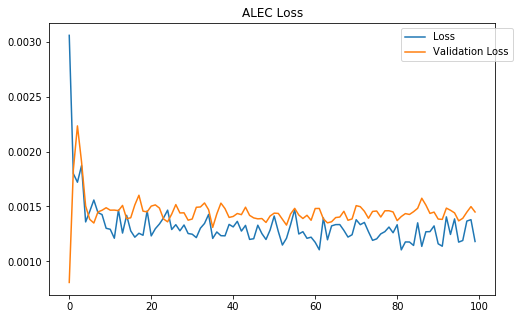

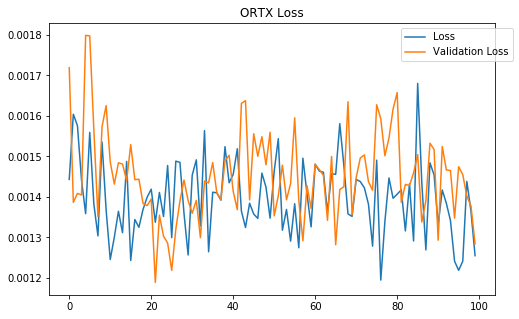

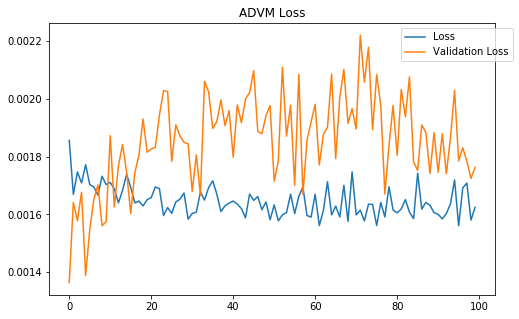

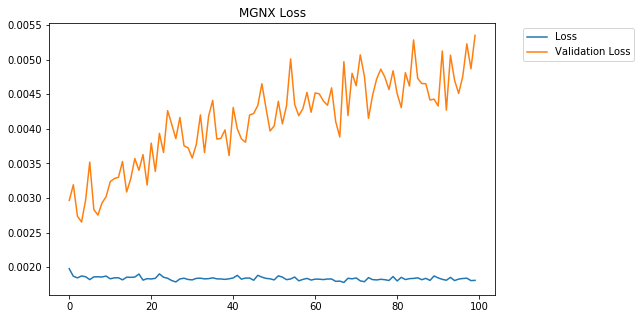

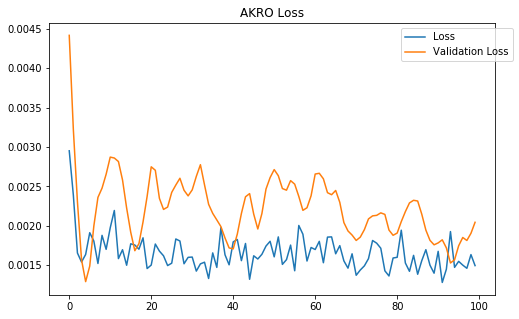

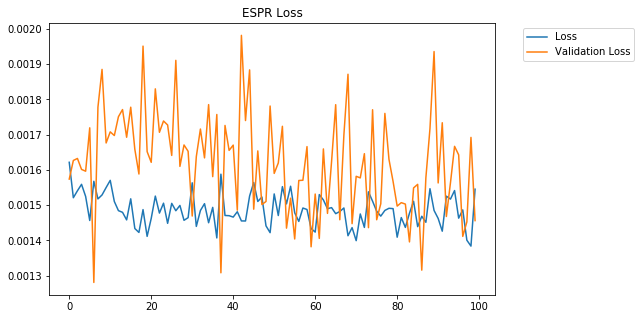

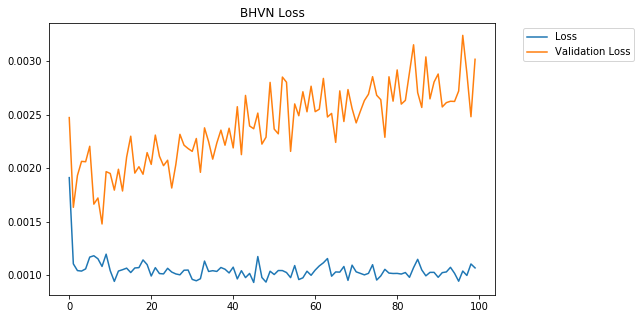

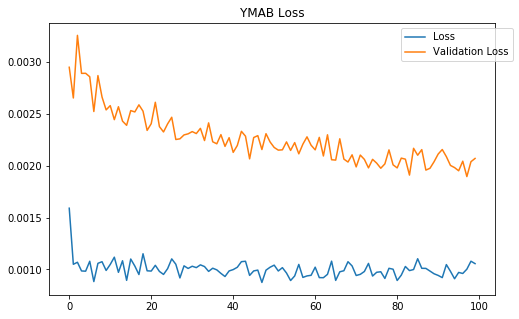

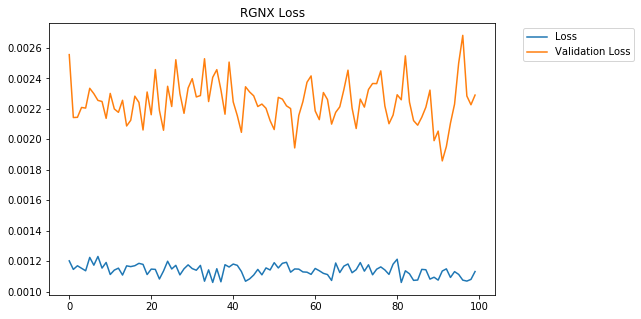

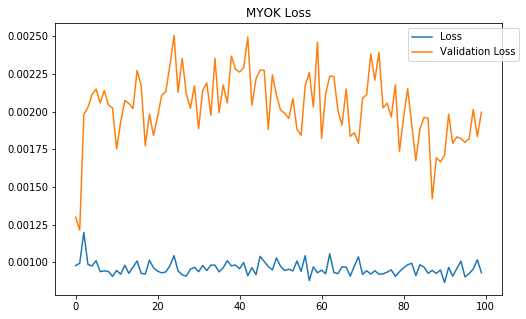

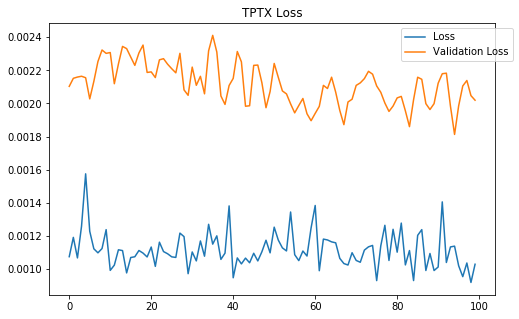

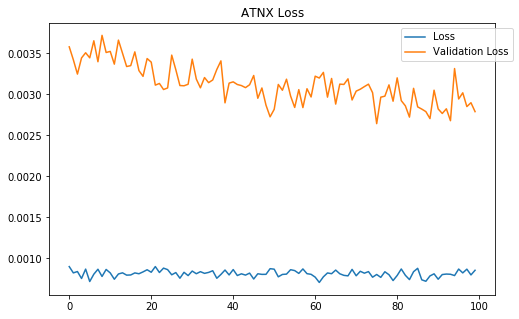

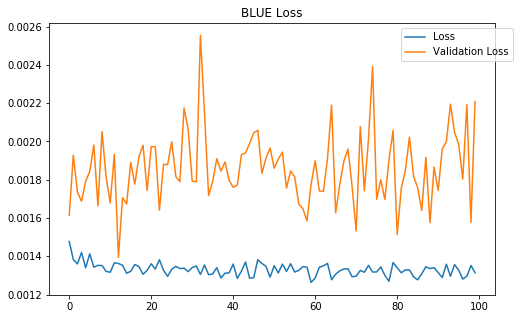

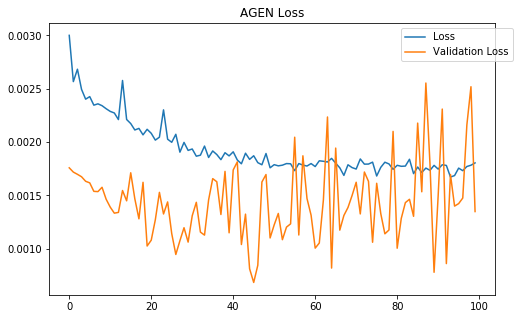

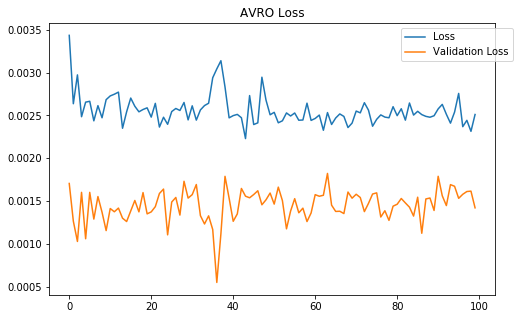

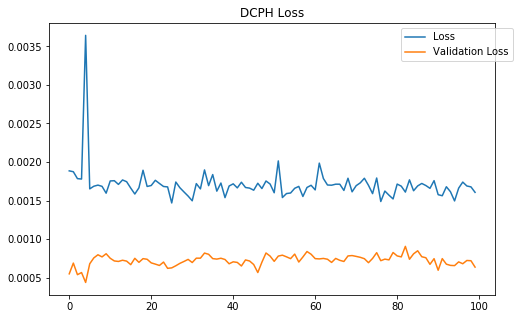

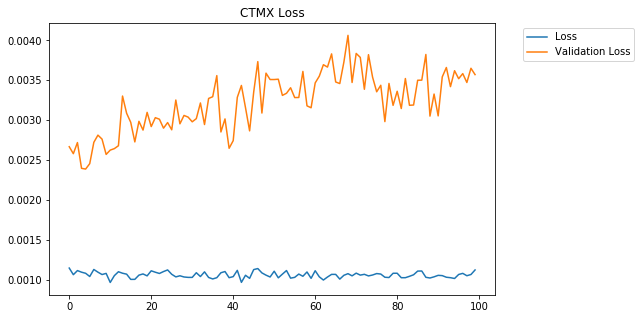

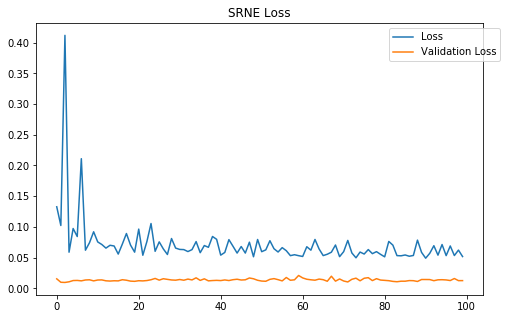

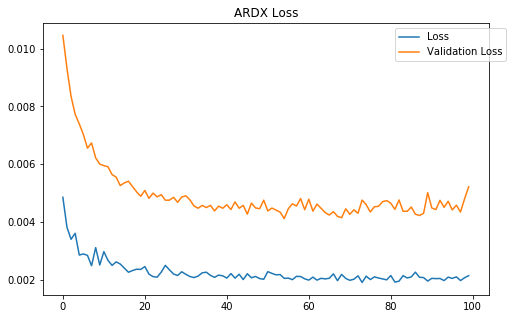

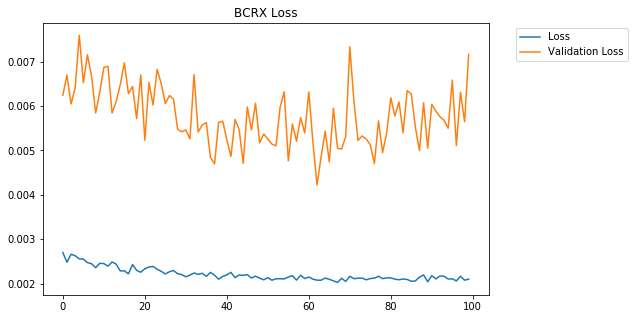

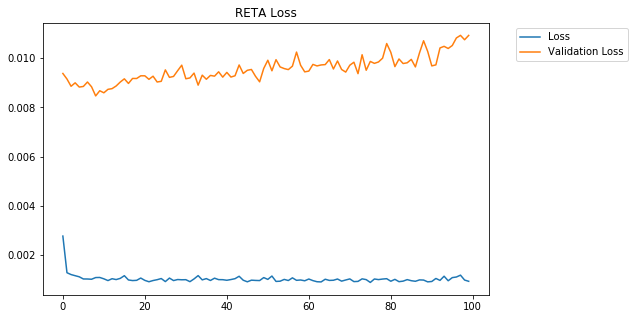

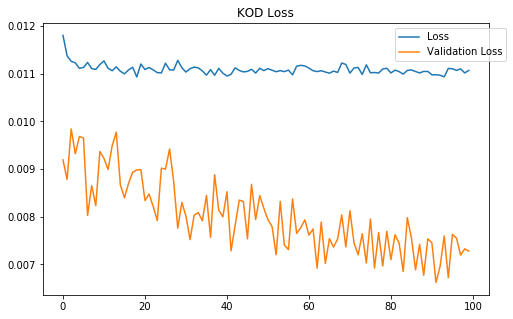

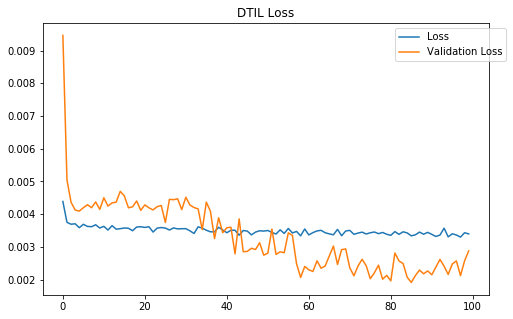

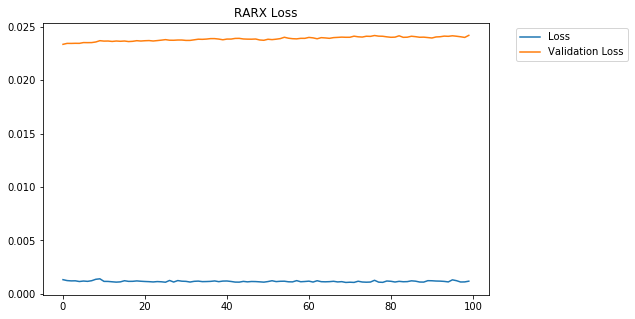

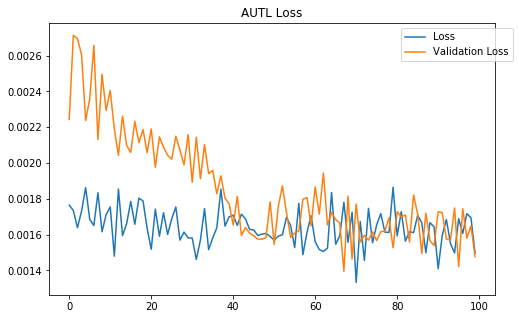

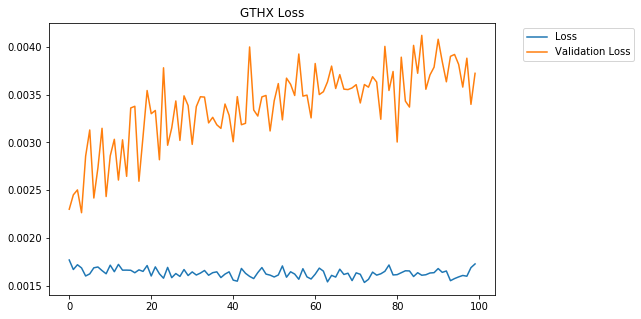

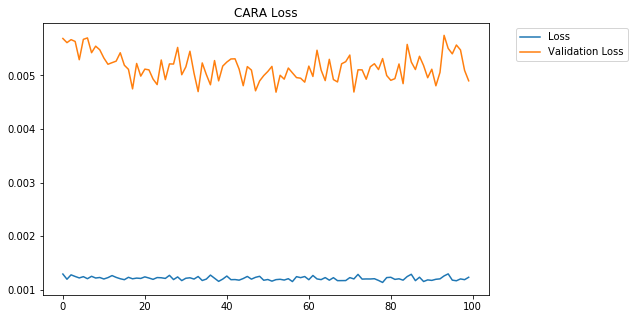

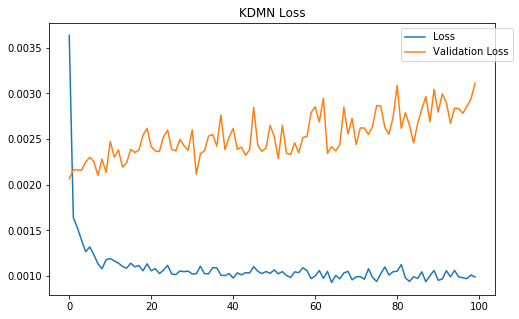

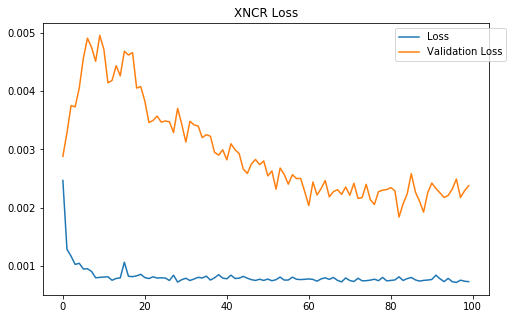

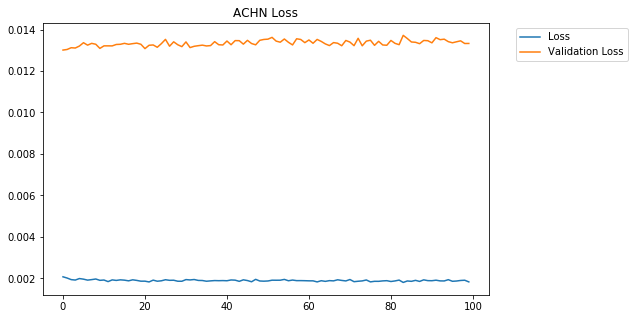

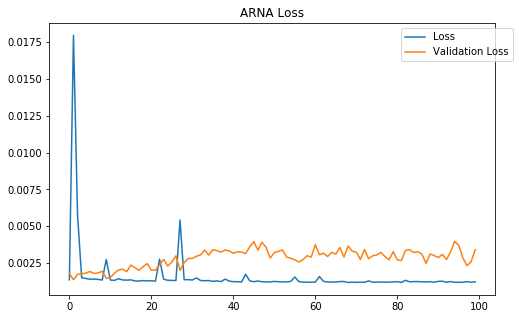

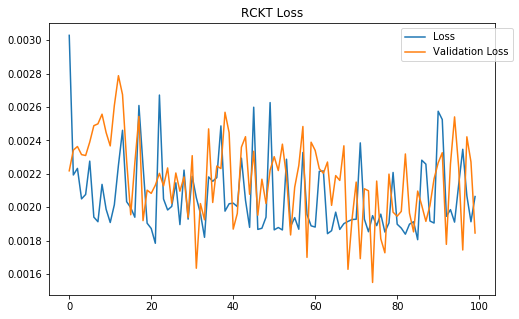

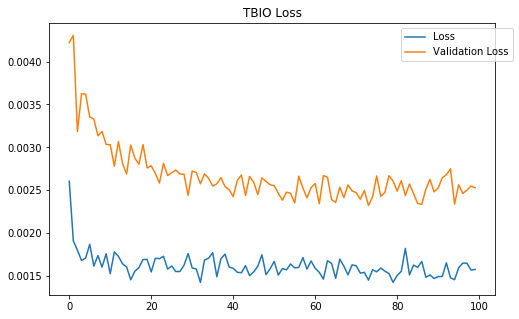

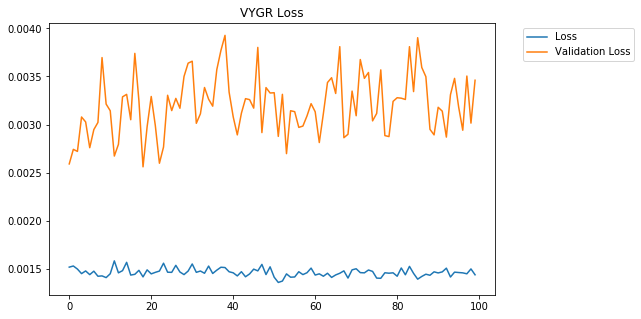

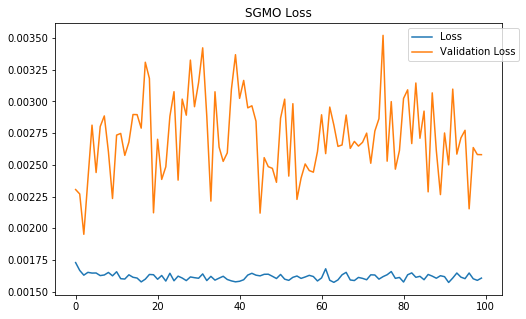

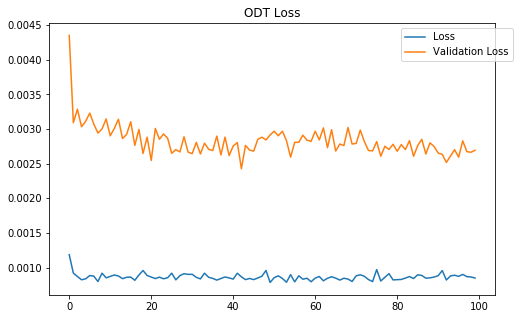

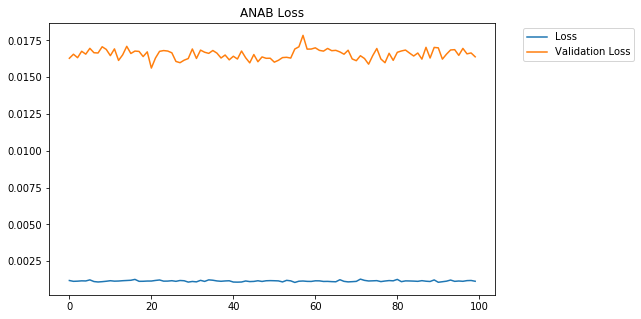

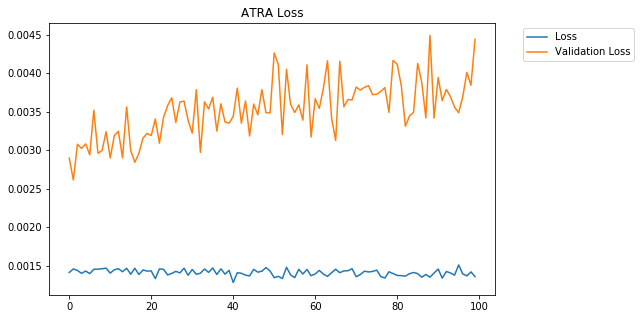

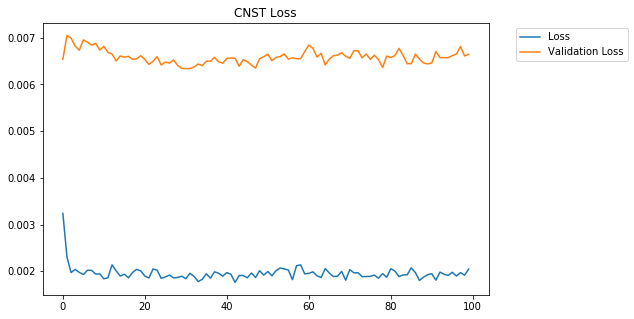

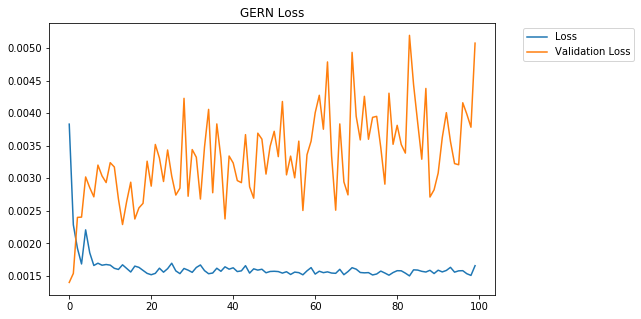

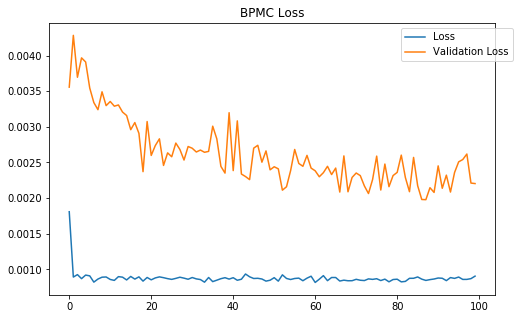

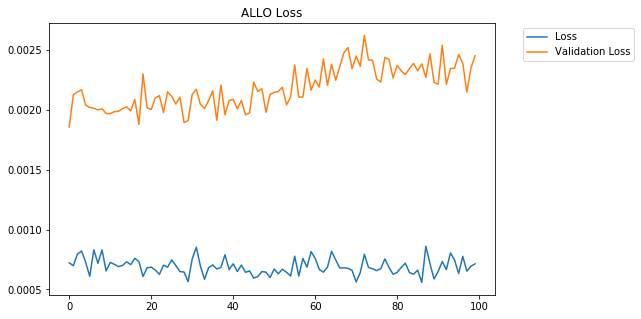

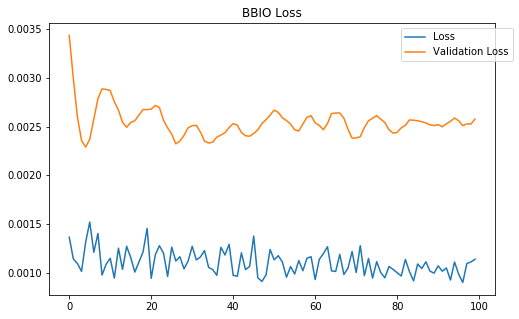

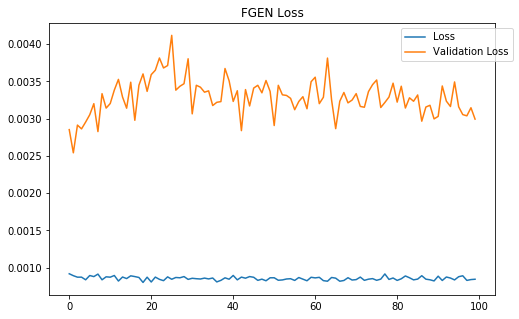

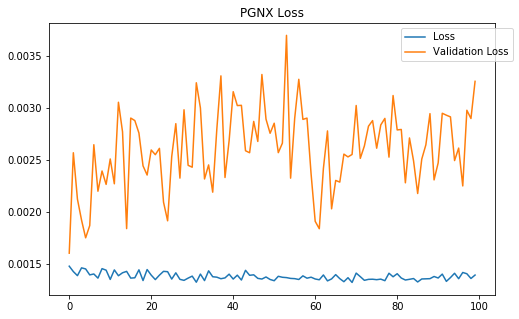

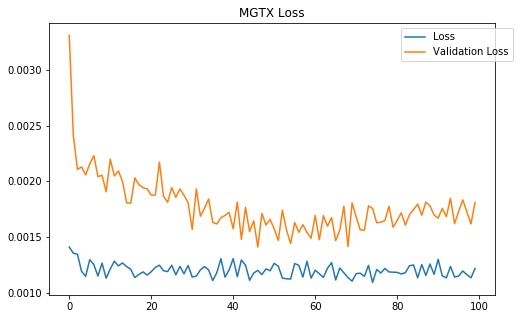

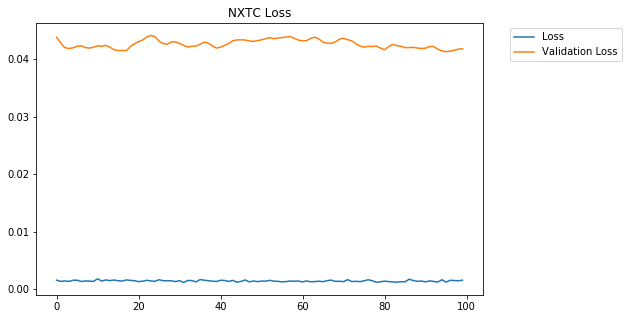

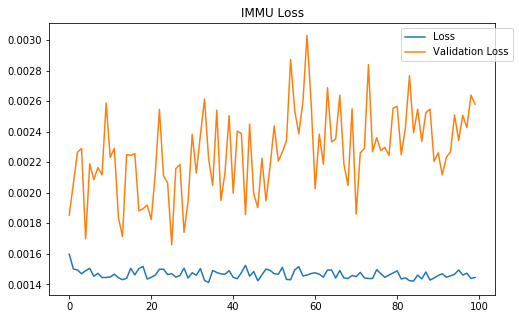

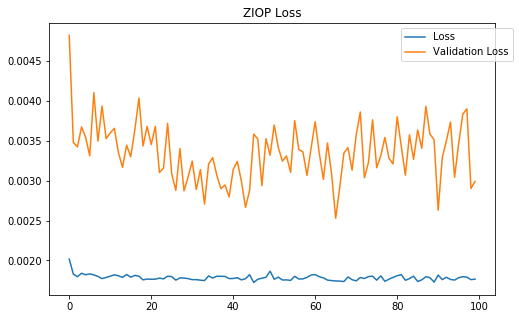

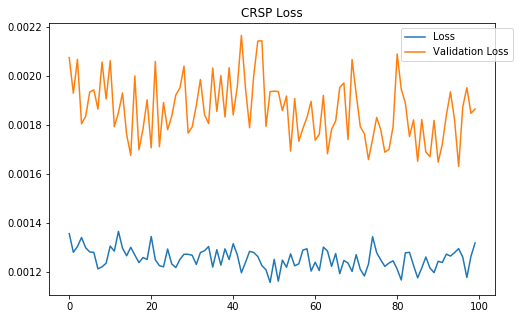

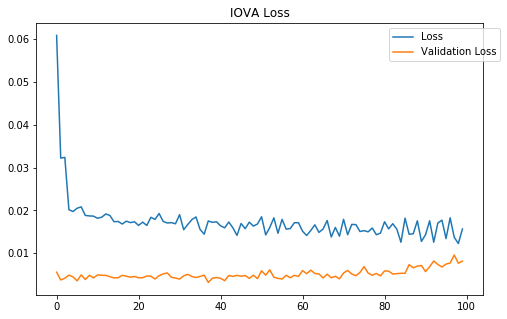

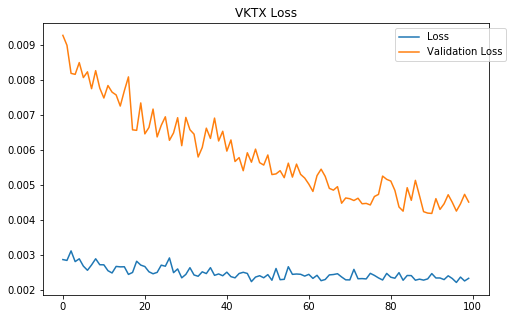

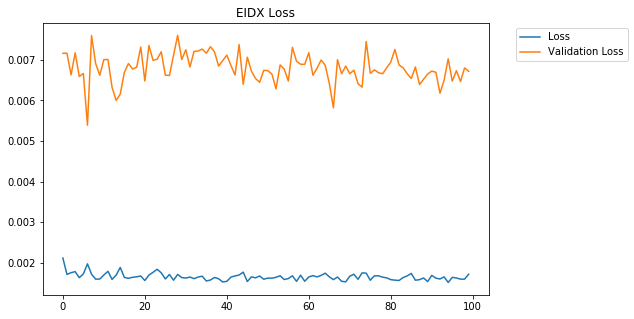

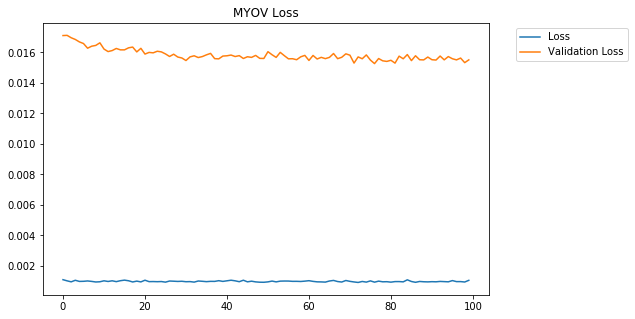

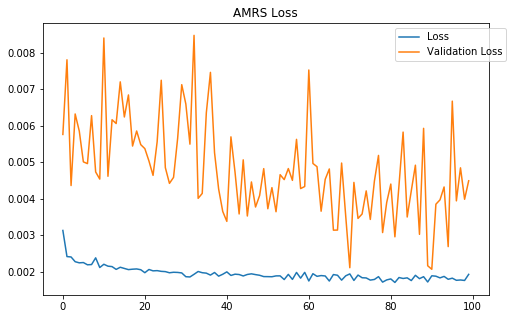

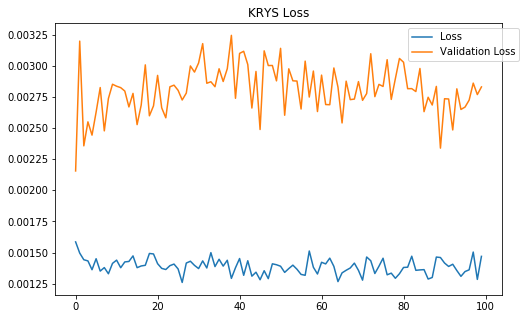

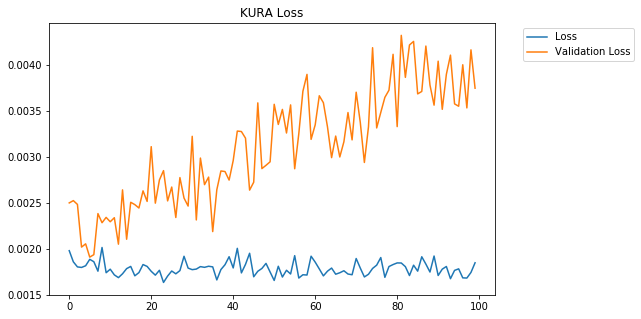

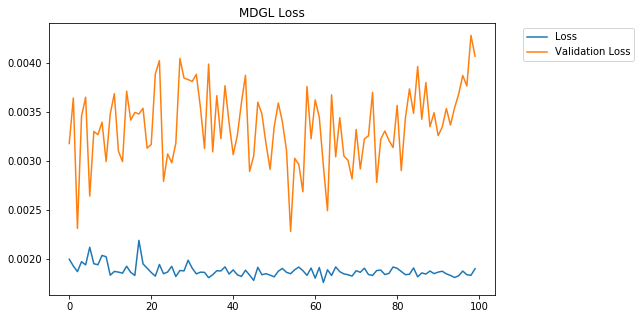

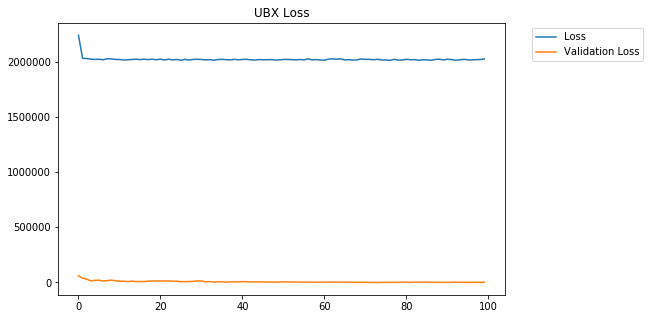

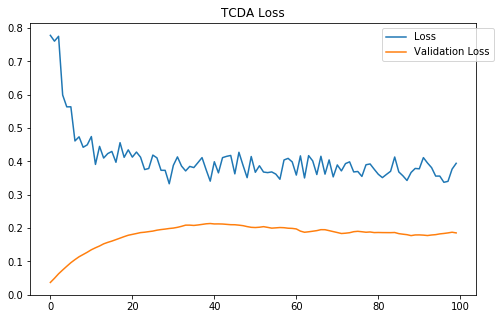

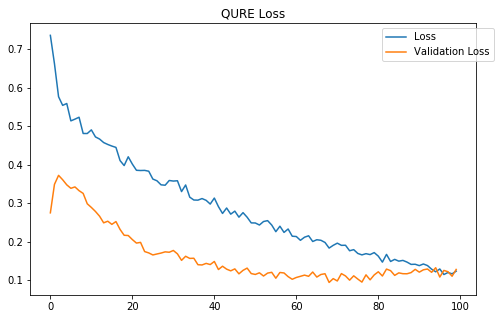

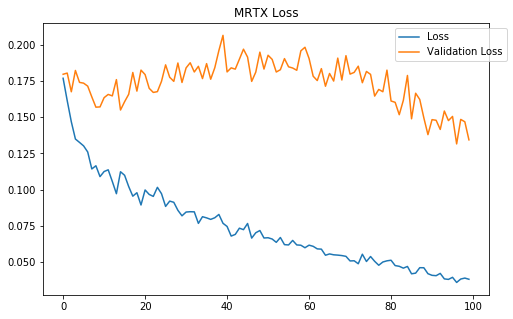

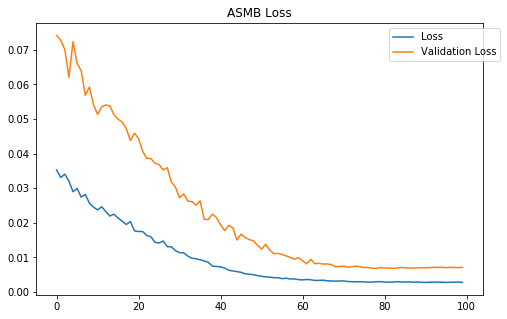

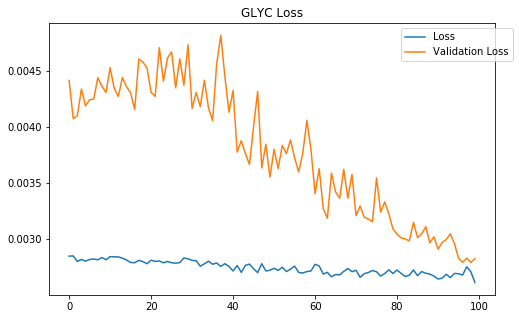

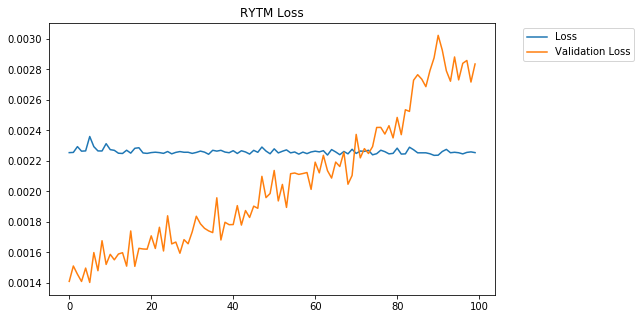

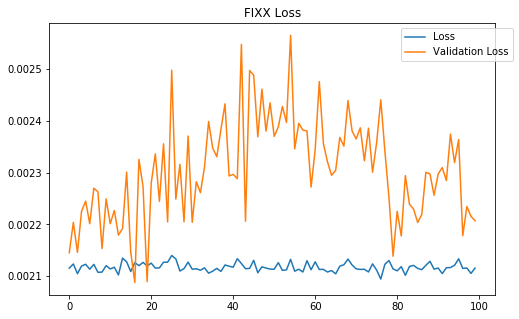

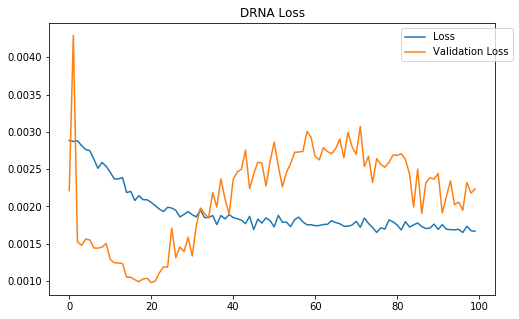

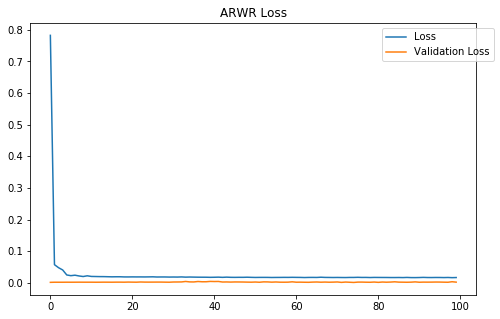

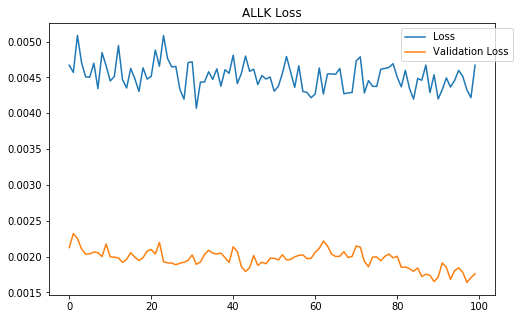

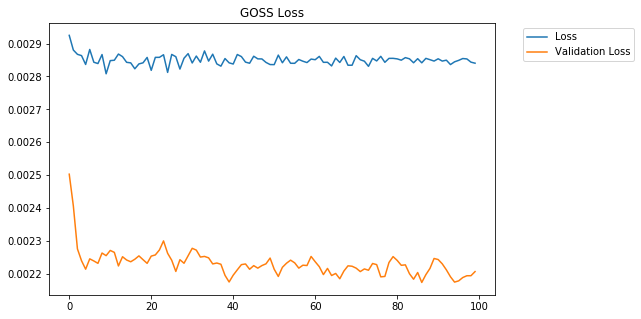

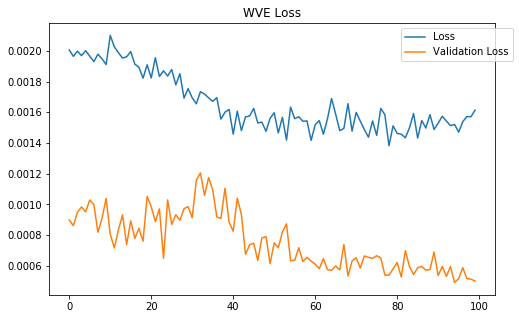

In [11]:
for stock in stocks:

    (feature_train, label_train, feature_test, label_test) = (processed_data[stock]['data_1'],processed_data[stock]['target_1'], 
                                                            processed_data[stock]['data_test'], processed_data[stock]['target_test']) 
    model.fit(feature_train, label_train, batch_size=25, epochs=100, validation_data = (feature_test, label_test), verbose=0)
    dict_ = model.history.history
    plt.figure(figsize=(8,5))
    plt.title(f"{stock} Loss")
    plt.plot(dict_['loss'], label = 'Loss')
    plt.plot(dict_['val_loss'], label= 'Validation Loss')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()
    model.save('model.h5')


In [12]:

(feature_train, label_train, feature_test, label_test) = (processed_data['SGMO']['data_1'],processed_data['SGMO']['target_1'], 
                                                            processed_data['SGMO']['data_test'], processed_data['SGMO']['target_test']) 

predict_train = model.predict(feature_train)
predict_test = model.predict(feature_test)
r2_score(label_test, predict_test), r2_score(label_train, predict_train)


(0.407640576823206, 0.28992039425405147)

Train on 4906 samples, validate on 40 samples
Epoch 1/1000
4906/4906 [==============================] - 0s 82us/step - loss: 0.0022 - val_loss: 5.1800e-04
Epoch 2/1000
4906/4906 [==============================] - 0s 80us/step - loss: 0.0021 - val_loss: 5.4065e-04
Epoch 3/1000
4906/4906 [==============================] - 0s 81us/step - loss: 0.0022 - val_loss: 6.0601e-04
Epoch 4/1000
4906/4906 [==============================] - 0s 84us/step - loss: 0.0022 - val_loss: 7.8723e-04
Epoch 5/1000
4906/4906 [==============================] - 0s 78us/step - loss: 0.0022 - val_loss: 7.7164e-04
Epoch 6/1000
4906/4906 [==============================] - 0s 80us/step - loss: 0.0021 - val_loss: 5.6342e-04
Epoch 7/1000
4906/4906 [==============================] - 0s 79us/step - loss: 0.0021 - val_loss: 5.8030e-04
Epoch 8/1000
4906/4906 [==============================] - 0s 80us/step - loss: 0.0021 - val_loss: 7.5323e-04
Epoch 9/1000
4906/4906 [==============================] - 0s 78us/step - loss: 0.0

4906/4906 [==============================] - 0s 84us/step - loss: 0.0022 - val_loss: 8.6362e-04
Epoch 152/1000
4906/4906 [==============================] - 0s 82us/step - loss: 0.0021 - val_loss: 0.0012
Epoch 153/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0021 - val_loss: 8.8585e-04
Epoch 154/1000
4906/4906 [==============================] - 0s 82us/step - loss: 0.0020 - val_loss: 9.6437e-04
Epoch 155/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0021 - val_loss: 9.1019e-04
Epoch 156/1000
4906/4906 [==============================] - 0s 84us/step - loss: 0.0020 - val_loss: 8.3984e-04
Epoch 157/1000
4906/4906 [==============================] - 0s 94us/step - loss: 0.0020 - val_loss: 9.2034e-04
Epoch 158/1000
4906/4906 [==============================] - 0s 96us/step - loss: 0.0022 - val_loss: 9.2875e-04
Epoch 159/1000
4906/4906 [==============================] - 0s 88us/step - loss: 0.0021 - val_loss: 9.1749e-04
Epoch 160/1000
4906/

Epoch 226/1000
4906/4906 [==============================] - 0s 82us/step - loss: 0.0021 - val_loss: 9.5837e-04
Epoch 227/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0020 - val_loss: 8.9170e-04
Epoch 228/1000
4906/4906 [==============================] - 0s 82us/step - loss: 0.0021 - val_loss: 9.6550e-04
Epoch 229/1000
4906/4906 [==============================] - 0s 82us/step - loss: 0.0021 - val_loss: 0.0010
Epoch 230/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0021 - val_loss: 9.7849e-04
Epoch 231/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0021 - val_loss: 8.6339e-04
Epoch 232/1000
4906/4906 [==============================] - 0s 82us/step - loss: 0.0021 - val_loss: 0.0011
Epoch 233/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0021 - val_loss: 9.1579e-04
Epoch 234/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0021 - val_loss: 0.0010
Epoch 235/100

Epoch 374/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0020 - val_loss: 7.6947e-04
Epoch 375/1000
4906/4906 [==============================] - 0s 82us/step - loss: 0.0021 - val_loss: 7.2658e-04
Epoch 376/1000
4906/4906 [==============================] - 0s 82us/step - loss: 0.0021 - val_loss: 8.3221e-04
Epoch 377/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0021 - val_loss: 6.6345e-04
Epoch 378/1000
4906/4906 [==============================] - 0s 82us/step - loss: 0.0020 - val_loss: 7.5101e-04
Epoch 379/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0021 - val_loss: 5.8464e-04
Epoch 380/1000
4906/4906 [==============================] - 0s 82us/step - loss: 0.0021 - val_loss: 7.3428e-04
Epoch 381/1000
4906/4906 [==============================] - 0s 91us/step - loss: 0.0020 - val_loss: 7.6785e-04
Epoch 382/1000
4906/4906 [==============================] - 0s 86us/step - loss: 0.0021 - val_loss: 4.8969e-04
E

Epoch 448/1000
4906/4906 [==============================] - 0s 95us/step - loss: 0.0021 - val_loss: 5.7137e-04
Epoch 449/1000
4906/4906 [==============================] - 1s 105us/step - loss: 0.0020 - val_loss: 6.6948e-04
Epoch 450/1000
4906/4906 [==============================] - 0s 93us/step - loss: 0.0020 - val_loss: 5.3482e-04
Epoch 451/1000
4906/4906 [==============================] - 0s 84us/step - loss: 0.0021 - val_loss: 6.0376e-04
Epoch 452/1000
4906/4906 [==============================] - 0s 87us/step - loss: 0.0020 - val_loss: 5.2419e-04
Epoch 453/1000
4906/4906 [==============================] - 0s 82us/step - loss: 0.0021 - val_loss: 6.0313e-04
Epoch 454/1000
4906/4906 [==============================] - 0s 87us/step - loss: 0.0021 - val_loss: 6.4559e-04
Epoch 455/1000
4906/4906 [==============================] - 0s 84us/step - loss: 0.0020 - val_loss: 5.4433e-04
Epoch 456/1000
4906/4906 [==============================] - 0s 86us/step - loss: 0.0020 - val_loss: 5.9807e-04


Epoch 522/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0019 - val_loss: 4.3890e-04
Epoch 523/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0019 - val_loss: 3.7129e-04
Epoch 524/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0019 - val_loss: 3.9757e-04
Epoch 525/1000
4906/4906 [==============================] - 0s 82us/step - loss: 0.0019 - val_loss: 4.1223e-04
Epoch 526/1000
4906/4906 [==============================] - 0s 82us/step - loss: 0.0019 - val_loss: 4.0016e-04
Epoch 527/1000
4906/4906 [==============================] - 0s 84us/step - loss: 0.0019 - val_loss: 3.8961e-04
Epoch 528/1000
4906/4906 [==============================] - 0s 84us/step - loss: 0.0020 - val_loss: 3.8827e-04
Epoch 529/1000
4906/4906 [==============================] - 0s 90us/step - loss: 0.0019 - val_loss: 3.6618e-04
Epoch 530/1000
4906/4906 [==============================] - 0s 93us/step - loss: 0.0019 - val_loss: 4.5967e-04
E

Epoch 669/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0018 - val_loss: 4.4172e-04
Epoch 670/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0018 - val_loss: 3.7798e-04
Epoch 671/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0018 - val_loss: 4.5845e-04
Epoch 672/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0018 - val_loss: 3.3837e-04
Epoch 673/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0019 - val_loss: 3.8762e-04
Epoch 674/1000
4906/4906 [==============================] - 0s 82us/step - loss: 0.0018 - val_loss: 4.4704e-04
Epoch 675/1000
4906/4906 [==============================] - 0s 84us/step - loss: 0.0018 - val_loss: 3.4167e-04
Epoch 676/1000
4906/4906 [==============================] - 0s 89us/step - loss: 0.0018 - val_loss: 4.7039e-04
Epoch 677/1000
4906/4906 [==============================] - 0s 84us/step - loss: 0.0019 - val_loss: 4.2702e-04
E

Epoch 743/1000
4906/4906 [==============================] - 0s 82us/step - loss: 0.0018 - val_loss: 6.7635e-04
Epoch 744/1000
4906/4906 [==============================] - 0s 91us/step - loss: 0.0018 - val_loss: 6.8897e-04
Epoch 745/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0018 - val_loss: 7.4558e-04
Epoch 746/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0019 - val_loss: 6.7744e-04
Epoch 747/1000
4906/4906 [==============================] - 0s 82us/step - loss: 0.0018 - val_loss: 6.5895e-04
Epoch 748/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0019 - val_loss: 5.7590e-04
Epoch 749/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0018 - val_loss: 7.7521e-04
Epoch 750/1000
4906/4906 [==============================] - 0s 82us/step - loss: 0.0018 - val_loss: 6.6771e-04
Epoch 751/1000
4906/4906 [==============================] - 0s 83us/step - loss: 0.0018 - val_loss: 7.2249e-04
E

4906/4906 [==============================] - 0s 84us/step - loss: 0.0017 - val_loss: 0.0020
Epoch 895/1000
4906/4906 [==============================] - 0s 81us/step - loss: 0.0017 - val_loss: 0.0019
Epoch 896/1000
4906/4906 [==============================] - 0s 80us/step - loss: 0.0017 - val_loss: 0.0020
Epoch 897/1000
4906/4906 [==============================] - 0s 79us/step - loss: 0.0017 - val_loss: 0.0020
Epoch 898/1000
4906/4906 [==============================] - 0s 80us/step - loss: 0.0017 - val_loss: 0.0022
Epoch 899/1000
4906/4906 [==============================] - 0s 80us/step - loss: 0.0018 - val_loss: 0.0022
Epoch 900/1000
4906/4906 [==============================] - 0s 84us/step - loss: 0.0018 - val_loss: 0.0021
Epoch 901/1000
4906/4906 [==============================] - 0s 98us/step - loss: 0.0017 - val_loss: 0.0023
Epoch 902/1000
4906/4906 [==============================] - 0s 90us/step - loss: 0.0018 - val_loss: 0.0022
Epoch 903/1000
4906/4906 [==========================

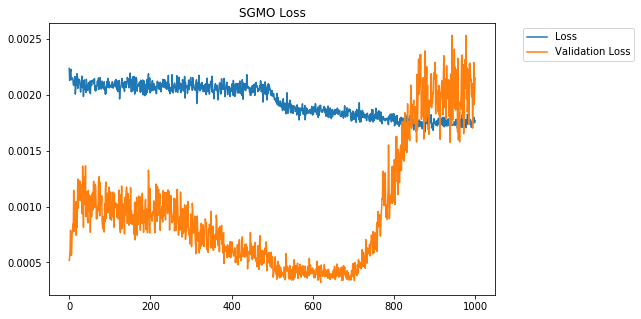

In [13]:
stock = 'SGMO'
(feature_train, label_train, feature_test, label_test) = (processed_data[stock]['data_1'],processed_data[stock]['target_1'], 
                                                            processed_data[stock]['data_test'], processed_data[stock]['target_test']) 
model.fit(feature_train, label_train, batch_size=50, epochs=5000, validation_data = (feature_test, label_test))
dict_ = model.history.history
plt.figure(figsize=(8,5))
plt.title(f"{stock} Loss")
plt.plot(dict_['loss'], label = 'Loss')
plt.plot(dict_['val_loss'], label= 'Validation Loss')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
model.save('model.h5')

In [20]:
model.save_weights('weight.h5')